# Analysis

List of words from: [dwyl/english-words](https://www.nytimes.com/1983/06/13/us/pioneer-10-to-leave-solar-system-today.html)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Load File

In [2]:
with open("words.txt", "r") as file:
    words = file.readlines()

print(len(words))

466550


In [3]:
five_letter_words = []
chars = set()

for word in words:
    word = word.lower().rstrip().lstrip()
    if len(word) == 5:
        five_letter_words.append(word)
        chars.update(list(word))
        
# del words
print(len(five_letter_words))
print(len(chars))

22950
36


In [4]:
non_alphabetical_chars = []
for c in chars:
    if not c.isalpha() or not c.islower():
        non_alphabetical_chars.append(c)
print(non_alphabetical_chars)

five_letter_words = list(filter(
    lambda x: not any([c in x for c in non_alphabetical_chars]),
    five_letter_words
))

print(len(five_letter_words))

['4', ',', '2', '0', '/', '-', '1', "'", '3', '.']
21952


In [5]:
from collections import Counter

char_counter = Counter()
for w in five_letter_words:
    char_counter.update(w)

char_counter = {k: v for k, v in sorted(char_counter.items(), key=lambda item: item[0])}

print(char_counter)

{'a': 12336, 'b': 2943, 'c': 3621, 'd': 3893, 'e': 10908, 'f': 1614, 'g': 2593, 'h': 3182, 'i': 7253, 'j': 630, 'k': 2462, 'l': 6108, 'm': 3455, 'n': 5988, 'o': 7166, 'p': 2891, 'q': 164, 'r': 7107, 's': 8280, 't': 5384, 'u': 4380, 'v': 1247, 'w': 1485, 'x': 459, 'y': 3451, 'z': 760}


[]

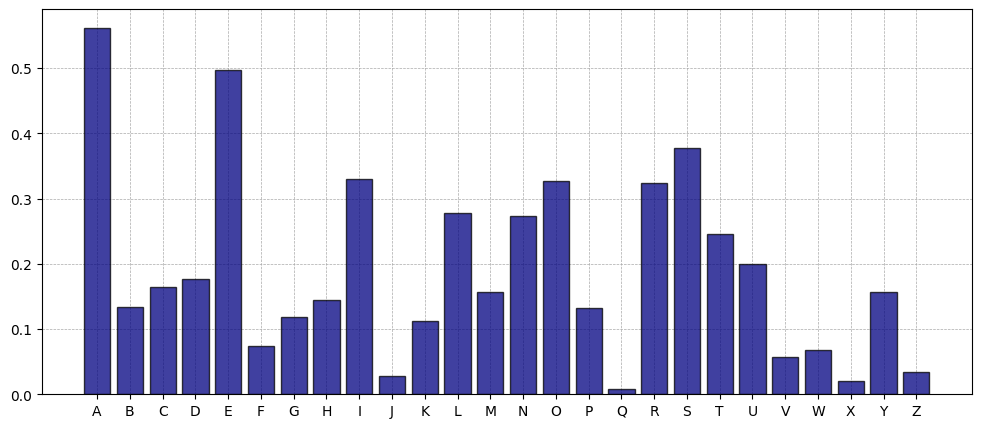

In [6]:
fig = plt.figure(figsize=(12.0, 5.0))
ax = fig.gca()

num_words = len(five_letter_words)
x = np.arange(len(char_counter))
ax.bar(x=x, height=np.array(list(char_counter.values())) / num_words, edgecolor="black", align="center", color="navy", alpha=0.75)
ax.set_xticks(x)
ax.set_xticklabels([c.upper() for c in char_counter.keys()], ha="center", va="top")
ax.grid(lw=0.5, ls="--", color="darkgrey")
ax.set_axisbelow(True)

plt.plot()

In [7]:
# use letter as nodes in a bipartide graph to determine connectivities:
graph_dict = {k: [] for k in char_counter.keys()}
for idx, word in enumerate(five_letter_words):
    for c in set(word):
        graph_dict[c].append(idx)

graph_dict_count = {k: round(len(v) / num_words,3) for k, v in graph_dict.items()}
print(graph_dict_count)

{'a': 0.476, 'b': 0.125, 'c': 0.154, 'd': 0.167, 'e': 0.427, 'f': 0.066, 'g': 0.111, 'h': 0.141, 'i': 0.309, 'j': 0.028, 'k': 0.107, 'l': 0.255, 'm': 0.149, 'n': 0.252, 'o': 0.291, 'p': 0.122, 'q': 0.007, 'r': 0.306, 's': 0.339, 't': 0.225, 'u': 0.192, 'v': 0.055, 'w': 0.067, 'x': 0.021, 'y': 0.154, 'z': 0.032}


[]

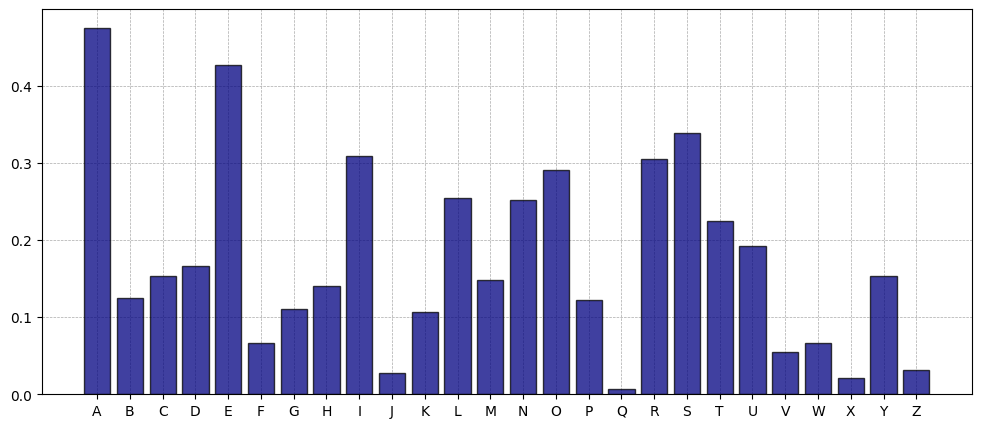

In [8]:
fig = plt.figure(figsize=(12.0, 5.0))
ax = fig.gca()

num_words = len(five_letter_words)
x = np.arange(len(graph_dict_count))
ax.bar(x=x, height=np.array(list(graph_dict_count.values())), edgecolor="black", align="center", color="navy", alpha=0.75)
ax.set_xticks(x)
ax.set_xticklabels([c.upper() for c in graph_dict_count.keys()], ha="center", va="top")
ax.grid(lw=0.5, ls="--", color="darkgrey")
ax.set_axisbelow(True)

plt.plot()

Top N letters:

['a', 'e', 's', 'i', 'r', 'o', 'l', 'n', 't', 'u']


[]

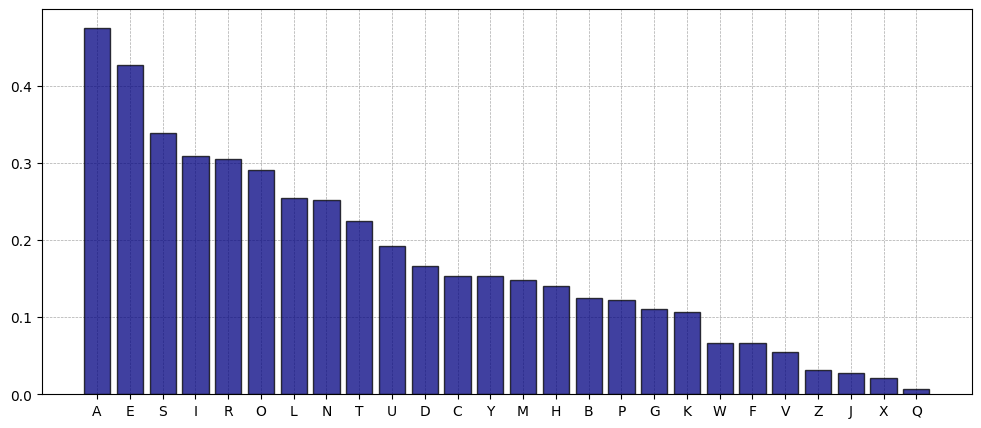

In [9]:
graph_dict_count_sorted = {k: v for k, v in sorted(graph_dict_count.items(), key=lambda item: item[1], reverse=True)}
top_10_letters = list(graph_dict_count_sorted.keys())[:10]
print(top_10_letters)

fig = plt.figure(figsize=(12.0, 5.0))
ax = fig.gca()

num_words = len(five_letter_words)
x = np.arange(len(graph_dict_count_sorted))
ax.bar(x=x, height=np.array(list(graph_dict_count_sorted.values())), edgecolor="black", align="center", color="navy", alpha=0.75)
ax.set_xticks(x)
ax.set_xticklabels([c.upper() for c in graph_dict_count_sorted.keys()], ha="center", va="top")
ax.grid(lw=0.5, ls="--", color="darkgrey")
ax.set_axisbelow(True)

plt.plot()

## Overlaps

Compile overlaps of different groups:

In [10]:
letter_nodes_labels = list(graph_dict.keys())
intersections = {}

num_letters = len(letter_nodes_labels)
intersections_count_array = -1 * np.ones(shape=(num_letters, num_letters), dtype=np.int64)

for idx1, k1 in enumerate(letter_nodes_labels):
    for idx2, k2 in enumerate(letter_nodes_labels[:idx1]):
        intersections[(k1, k2)] = list(set(graph_dict[k1]) & set(graph_dict[k2]))
        intersections_count_array[idx1, idx2] = len(intersections[(k1, k2)])

print(intersections_count_array.shape)

(26, 26)


[]

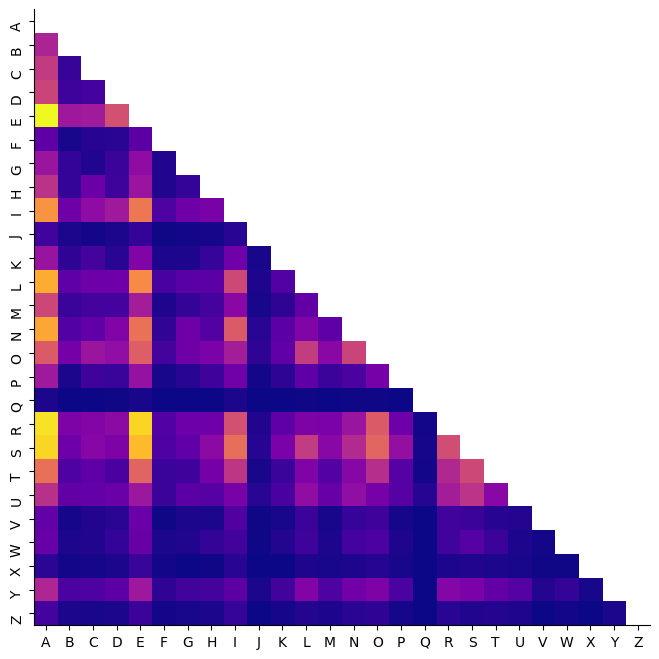

In [11]:
intersections_masked_array = np.ma.masked_where(
    intersections_count_array < 0, intersections_count_array, copy=True)

fig = plt.figure(figsize=(8.0, 8.0))
ax = fig.gca()

num_words = len(five_letter_words)
x = np.arange(len(graph_dict_count))
ax.imshow(intersections_masked_array, cmap="plasma", origin="upper")
ax.set_xticks(x)
ax.set_xticklabels([c.upper() for c in graph_dict_count.keys()], ha="center", va="top")
ax.set_yticks(x)
ax.set_yticklabels([c.upper() for c in graph_dict_count.keys()], ha="right", va="top",rotation=90)
ax.spines[['right', 'top']].set_visible(False)
# ax.grid(lw=0.5, ls="--", color="darkgrey")
# ax.set_axisbelow(True)

plt.plot()

In [12]:
for i, j in enumerate(np.argmin(intersections_masked_array, axis=1)):
    print((letter_nodes_labels[i], letter_nodes_labels[j]), (i,j), intersections_masked_array[i,j])

('a', 'a') (0, 0) --
('b', 'a') (1, 0) 1265
('c', 'b') (2, 1) 256
('d', 'b') (3, 1) 305
('e', 'b') (4, 1) 1122
('f', 'b') (5, 1) 58
('g', 'f') (6, 5) 112
('h', 'f') (7, 5) 110
('i', 'f') (8, 5) 444
('j', 'f') (9, 5) 18
('k', 'j') (10, 9) 62
('l', 'j') (11, 9) 87
('m', 'j') (12, 9) 62
('n', 'j') (13, 9) 159
('o', 'j') (14, 9) 204
('p', 'j') (15, 9) 34
('q', 'j') (16, 9) 1
('r', 'q') (17, 16) 30
('s', 'q') (18, 16) 47
('t', 'q') (19, 16) 37
('u', 'q') (20, 16) 136
('v', 'q') (21, 16) 2
('w', 'q') (22, 16) 3
('x', 'q') (23, 16) 0
('y', 'q') (24, 16) 7
('z', 'x') (25, 23) 2


## Overlap in Top 10:

In [13]:
intersections = {}

num_letters = len(top_10_letters)
intersections_count_array = -1 * np.ones(shape=(num_letters, num_letters), dtype=np.int64)

for idx1, k1 in enumerate(top_10_letters):
    for idx2, k2 in enumerate(top_10_letters[:idx1]):
        intersections[(k1, k2)] = list(set(graph_dict[k1]) & set(graph_dict[k2]))
        intersections_count_array[idx1, idx2] = len(intersections[(k1, k2)])

print(intersections_count_array.shape)

(10, 10)


[]

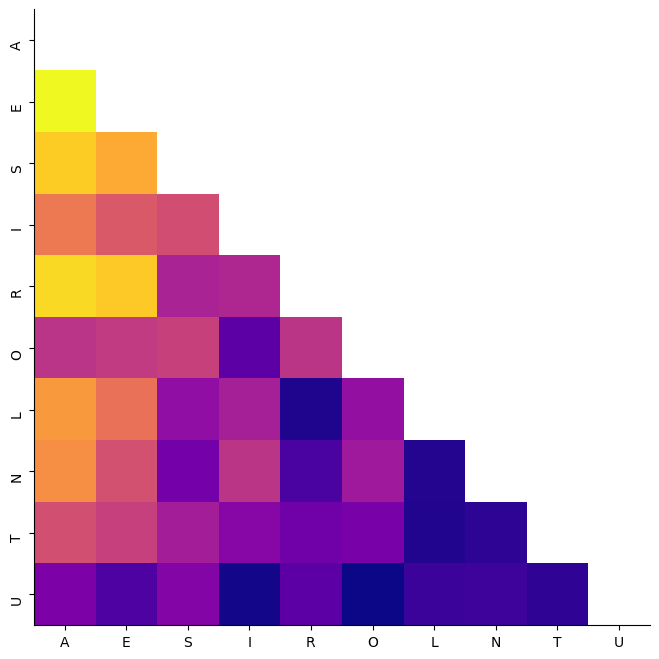

In [14]:
intersections_masked_array = np.ma.masked_where(
    intersections_count_array < 0, intersections_count_array, copy=True)

fig = plt.figure(figsize=(8.0, 8.0))
ax = fig.gca()

num_words = len(five_letter_words)
x = np.arange(len(top_10_letters))
ax.imshow(intersections_masked_array, cmap="plasma", origin="upper")
ax.set_xticks(x)
ax.set_xticklabels([c.upper() for c in top_10_letters], ha="center", va="top")
ax.set_yticks(x)
ax.set_yticklabels([c.upper() for c in top_10_letters], ha="right", va="top",rotation=90)
ax.spines[['right', 'top']].set_visible(False)
# ax.grid(lw=0.5, ls="--", color="darkgrey")
# ax.set_axisbelow(True)

plt.plot()

In [15]:
for i, j in enumerate(np.argmax(intersections_masked_array, axis=1)):
    print((top_10_letters[i], top_10_letters[j]), (i,j), intersections_masked_array[i,j])

('a', 'a') (0, 0) --
('e', 'a') (1, 0) 3331
('s', 'a') (2, 0) 3063
('i', 'a') (3, 0) 2487
('r', 'a') (4, 0) 3150
('o', 's') (5, 2) 2007
('l', 'a') (6, 0) 2723
('n', 'a') (7, 0) 2657
('t', 'a') (8, 0) 2130
('u', 's') (9, 2) 1452


## Form a Graph of Top-10:

In [16]:
import networkx as nx
import time

In [17]:
graph = nx.Graph()
graph.add_nodes_from(five_letter_words)
print(graph.number_of_nodes())

21952


In [19]:
for letter in top_10_letters:
    tic = time.time()
    words = graph_dict[letter]
    for idx, w1 in enumerate(words):
        for w2 in words[:idx]:
            graph.add_edge(w1, w2)
    toc = time.time()
    print(f"{letter} -- [{round(toc - tic, 3)} sec.]")

print(graph.number_of_edges())

a -- [35.789 sec.]
e -- [73.656 sec.]
s -- [29.939 sec.]
i -- [27.207 sec.]
r -- [32.138 sec.]
o -- [29.667 sec.]
l -- [30.282 sec.]
n -- [29.34 sec.]
t -- [29.919 sec.]
u -- [19.331 sec.]


NameError: name 'number_of_edges' is not defined

In [22]:
print(graph.number_of_edges())
print(2 * graph.number_of_edges() / graph.number_of_nodes() ** 2)

174135934
0.1807129830169001


In [ ]:
tic = time.time()
clusters = nx.clustering(graph)
toc = time.time()
print(f"[{round(toc - tic, 3)} sec.] Number of Clusters: {len(clusters)}")